# **Analisis de Centros Delanteros en el futbol Argentino desde 2008 hasta 2022**

Base de datos:
https://www.kaggle.com/datasets/rodrigogastonrubio/futbolargentino

Problematica a responder:

Existe la tendencia en el futbol argentino de usar cada vez menos centro delanteros altos (considerados de 180 cm en adelante ) ?

Analicemos temporada por temporada

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
# Definimos el identificador de la hoja de cálculo de Google Sheets
Id_planilla = '1O5aNGjVpiDM64iC5RttAD9nEl4lQa_S8'

# Construimos la URL para acceder a la hoja de cálculo en formato CSV
URL = f'https://docs.google.com/spreadsheets/d/{Id_planilla}/gviz/tq?tqx=out:csv&sheet='

In [52]:
# Convertimos en DataFrame
df_DCentro = pd.read_csv(URL + 'Data')

In [54]:
numfilas=len(df_DCentro)
print(numfilas)

12092


In [55]:
#Contar los NaN de las columnas
df_DCentro.isna().sum()


Jugadores              0
Posicion               0
Edad                   2
Altura               268
Pie                  357
Fichado                0
Equipo Anterior     1536
Valor de mercado    1704
Temporada              0
Club                   1
dtype: int64

In [56]:
#Analizar si hay duplicados y NaN
duplicados_Jugadores=df_DCentro.duplicated()
duplicados_Jugadores.sum()

0

In [57]:
#Voy a utilizar solo las columnas Jugadores, Posicion, Altura y Club
columnas_a_eliminar = ['Edad', 'Pie', 'Fichado', 'Equipo Anterior','Valor de mercado']
df_DCentro.drop(columns=columnas_a_eliminar, inplace=True)


In [59]:
numfilas=len(df_DCentro)
print(numfilas)

display(df_DCentro.head())

12092


,Jugadores,Posicion,Altura,Temporada,Club
0,Nicolás Gianni,Centrocampista,"1,75",2008,Argentinos Juniors
1,Maximiliano Sola,Defensa,"1,80",2008,Argentinos Juniors
2,Nicolás Navarro,Portero,"1,90",2008,Argentinos Juniors
3,Juan Carrera,Portero,"1,91",2008,Argentinos Juniors
4,Sebastián Torrico,Portero,"1,86",2008,Argentinos Juniors


In [60]:
#Eliminar los NaN de la columna Altura
df_DCentro.dropna(subset=['Altura'], inplace=True)
#Verificar cuantas filas quedan
numfilas=len(df_DCentro)
print(numfilas)

11824


In [61]:
#Limpiar las , de la columna Altura por vacio
df_DCentro['Altura'] = df_DCentro['Altura'].str.replace(',', '')
display(df_DCentro.head())

,Jugadores,Posicion,Altura,Temporada,Club
0,Nicolás Gianni,Centrocampista,175,2008,Argentinos Juniors
1,Maximiliano Sola,Defensa,180,2008,Argentinos Juniors
2,Nicolás Navarro,Portero,190,2008,Argentinos Juniors
3,Juan Carrera,Portero,191,2008,Argentinos Juniors
4,Sebastián Torrico,Portero,186,2008,Argentinos Juniors


In [62]:
df_DCentro.dtypes

Jugadores    object
Posicion     object
Altura       object
Temporada     int64
Club         object
dtype: object

In [63]:
#Convertir altura a entero
df_DCentro['Altura'] = df_DCentro['Altura'].astype(int)
df_DCentro.dtypes

Jugadores    object
Posicion     object
Altura        int64
Temporada     int64
Club         object
dtype: object

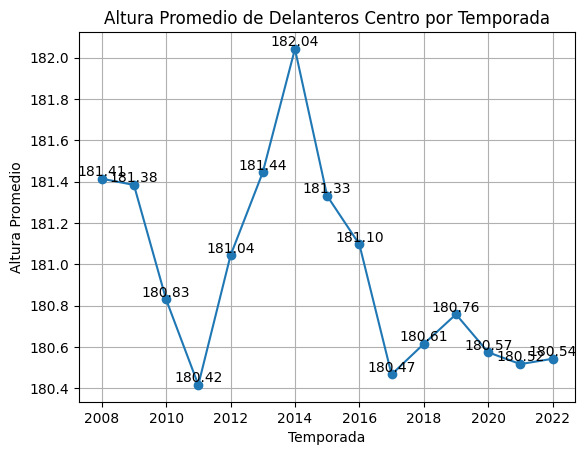

In [64]:
#Altura promedio por temporada referido a la columna posicion con valor delantero centro
# Filtrar el DataFrame para incluir solo delanteros centro
df_delanteros_centro = df_DCentro[df_DCentro['Posicion'] == 'Delantero centro']

# Calcular la altura promedio por temporada
altura_promedio_por_temporada = df_delanteros_centro.groupby('Temporada')['Altura'].mean()

# Crear el gráfico de líneas con círculos en cada temporada
plt.plot(altura_promedio_por_temporada.index, altura_promedio_por_temporada.values, marker='o')
#Incluir la referencia promedio arriba de cada punto
for x, y in zip(altura_promedio_por_temporada.index, altura_promedio_por_temporada.values):
    plt.text(x, y, f'{y:.2f}', ha='center', va='bottom')
plt.xlabel('Temporada')
plt.ylabel('Altura Promedio')
plt.title('Altura Promedio de Delanteros Centro por Temporada')
plt.grid(True)
plt.show()


In [89]:
# Filtrar el DataFrame para incluir solo delanteros centro
df_delanteros_centro = df_DCentro[df_DCentro['Posicion'] == 'Delantero centro']
# Filtrar el DataFrame para incluir solo delanteros centro con altura mayor o igual a 180 cm
df_delanteros_bajos = df_DCentro[df_DCentro['Altura'] <= 180]

df_delanteros_altos = df_DCentro[df_DCentro['Altura'] >= 180]
# Contar el número de delanteros altos por temporada
conteo_delanteros_altos = df_delanteros_altos.groupby('Temporada')['Jugadores'].count()

# Contar el número de delanteros bajos por temporada
conteo_delanteros_bajos = df_delanteros_bajos.groupby('Temporada')['Jugadores'].count()

# Mostrar el resultado
print("Delanteros Centro con Altura Mayor o Igual a 180 cm:")
print(conteo_delanteros_altos)

print("\nDelanteros Centro con Altura Menor a 180 cm:")
display(conteo_delanteros_bajos)

Delanteros Centro con Altura Mayor o Igual a 180 cm:
Temporada
2008    357
2009    339
2010    350
2011    360
2012    344
2013    377
2014    447
2015    382
2016    354
2017    386
2018    358
2019    388
2020    446
2021    379
2022    355
Name: Jugadores, dtype: int64

Delanteros Centro con Altura Menor a 180 cm:


Temporada
2008    430
2009    426
2010    410
2011    434
2012    423
2013    428
2014    503
2015    474
2016    429
2017    499
2018    457
2019    543
2020    626
2021    484
2022    465
Name: Jugadores, dtype: int64

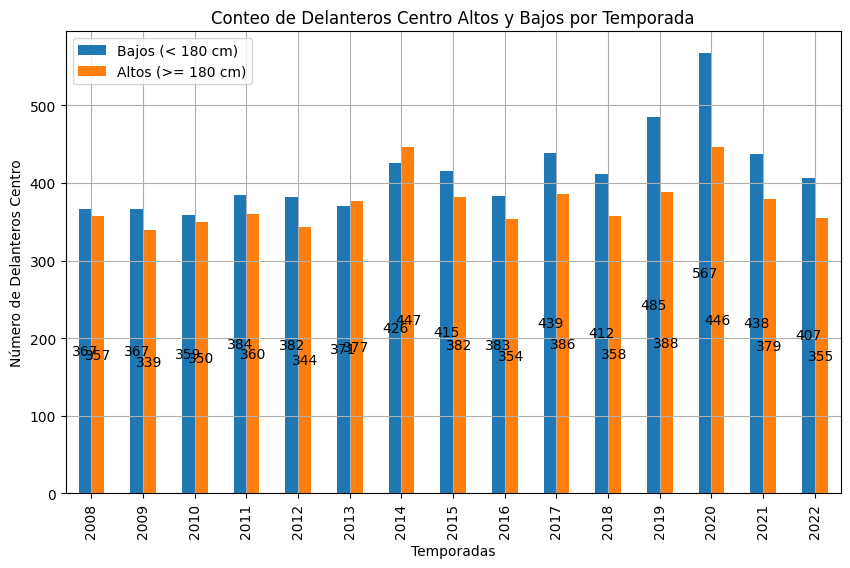

In [106]:
# Agrupar por temporada y altura (alto/bajo) y contar jugadores
conteo_por_temporada_altura = df_DCentro.groupby(['Temporada', df_DCentro['Altura'] >= 180])['Jugadores'].count().unstack(fill_value=0)

# Crear el gráfico de barras
ax = conteo_por_temporada_altura.plot(kind='bar', figsize=(10, 6))

# Agregar etiquetas con las cantidades en el centro de cada barra
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height}', (x + width/2, y + height/2), ha='center', va='center')

plt.xlabel('Temporadas')
plt.ylabel('Número de Delanteros Centro')
plt.title('Conteo de Delanteros Centro Altos y Bajos por Temporada')
plt.legend(['Bajos (< 180 cm)', 'Altos (>= 180 cm)'])
plt.grid(True)
plt.show()

**Conclusiones**

Queda demostrado que a lo largo de las temporadas la tendencia es de utilizar delanteros denominados "Bajos" , salvo en la temporada 2014.

Por otro lado tambien la media de altura tiene una tendencia a la baja luego de la temporada 2016 en adelante como se muestra en el grafico 'Altura Promedio de Delanteros Centro por Temporada'